2024-02-16 16:02:20.336 
  command:

    streamlit run /Users/mithil/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


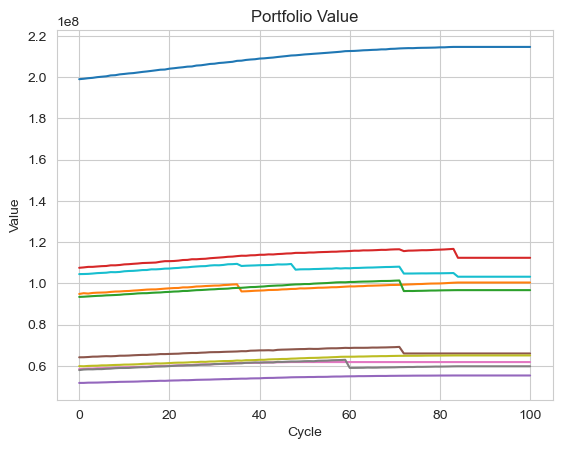

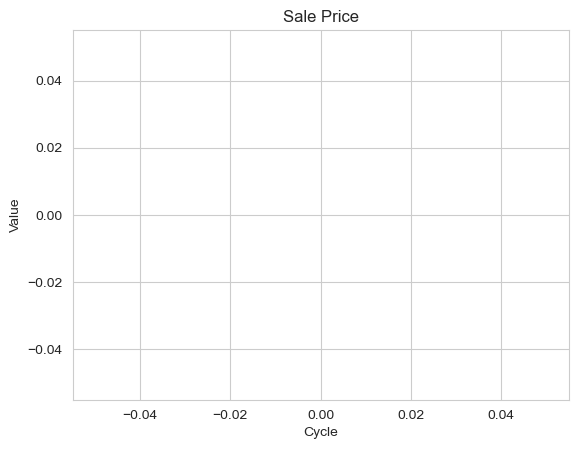

In [1]:
import matplotlib.pyplot as plt

import Agents.Loan as Loan
import Agents.LoanInvestor as LoanInvestor
import Agents.LoanTrader as LoanTrader
import numpy as np
import streamlit as st


class loanMarket:
    def __init__(self):

        self.cycle = 0
        self.num_loans = st.slider("Number of loans", 0, 10000, 100)
        self.num_investors = st.slider("Number of investors", 0, 1000, 10)
        self.num_traders = st.slider("Number of traders", 0, 1000, 10)
        self.interest_rate = st.slider('Interest Rate', min_value=0.00, max_value=0.15, value=0.05, step=0.01)


        # creating the universe of loans
        self.loans = [Loan.LoanObj(float_interest=self.interest_rate) for _ in range(self.num_loans)]

        # creating the universe of investors
        self.investors = [LoanInvestor.LoanInvestorObj() for _ in range(self.num_investors)]

        # creating the universe of traders
        self.traders = [LoanTrader.LoanTraderObj(max_investors=self.num_investors // self.num_traders) for _ in
                        range(self.num_traders)]

    def initialize(self):

        # Assigning loans to investors
        for investor in self.investors:
            available_loans = [loan for loan in self.loans if loan.current_owner == 'no owner']
            investor.initialize_portfolio(available_loans)

        # Assigning a trader to the investors
        for trader in self.traders:
            trader.add_investors(self.investors)

    def update(self):
        for loan in self.loans:
            # loans are updated independent of investors
            loan.update(self.cycle + 1, float_interest=self.interest_rate)
        for investor in self.investors:
            # investors are updated based on the loans they hold
            investor.update(cycle=self.cycle + 1)
        for trader in self.traders:
            # traders are updated based on the investors they hold
            trader.update(cycle=self.cycle + 1)

        self.cycle += 1

    def get_average_portfolio_values(self, plot_values=False):
        # Calculate the average portfolio value at the end of each cycle
        avg_portfolio_values = []
        for cycle in range(self.cycle):
            cycle_values = [investor.portfolio_values[cycle] for investor in self.investors if
                            investor.portfolio_values]
            avg_value = sum(cycle_values) / len(cycle_values) if cycle_values else 0
            avg_portfolio_values.append(avg_value)

        if plot_values:
            plt.plot(avg_portfolio_values)
            plt.title('Average Portfolio Value')
            plt.xlabel('Cycle')
            plt.ylabel('Value')
            plt.show()

        return avg_portfolio_values

    def plot_portfolio_values(self):
        ax = plt.figure()
        # Plot the portfolio value for each investor
        for investor in self.investors:
            plt.plot(investor.portfolio_values)
        plt.title('Portfolio Value')
        plt.xlabel('Cycle')
        plt.ylabel('Value')
        st.pyplot(ax)

    def plot_sale_prices(self):
        ax = plt.figure()
        for loan in self.loans:
            plt.plot(loan.sale_price_history)
        plt.title('Sale Price')
        plt.xlabel('Cycle')
        plt.ylabel('Value')
        st.pyplot(ax)


markettrial = loanMarket()
markettrial.initialize()

cycles = st.slider("Number of cycles", 0, 1000, 100)

for _ in range(cycles):
    markettrial.update()

markettrial.plot_portfolio_values()
markettrial.plot_sale_prices()



In [4]:
markettrial = loanMarket()
markettrial.initialize()

In [5]:
for _ in range(100):
    markettrial.update()
    
import matplotlib.pyplot as plt  
markettrial.plot_portfolio_values()